# Springboard - Data Science Career Track - Capstone 1

In [311]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy as pts
import statsmodels.api as sm

# Import tools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import cdist

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

## Data Wrangling

In [312]:
# Read in data from CSV
df = pd.read_csv('allCongressDataPublish.csv')

# Inspect the data
df.head()

,stateDist,abroadPrcnt,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,prcntExAliens,totalHouseholds,under10k,over10k,over15k,...,numPassH,numEnact,passPrcnt,congNum,partyControl,demSeats,repSeats,otherSeats,ses,sesNorm
0,AK.0,NaN,54.541518,588358.0,1.327253,NaN,106181.0,14.029817,85.970183,78.523465,...,3.0,2.0,6.666667,93.0,D,243.0,192.0,0.0,0.147659,35.339666
1,AL.1,NaN,15.405078,543377.0,0.457325,NaN,148712.0,20.154392,79.845608,72.468261,...,0.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.075380,11.690437
2,AL.2,NaN,24.197693,530286.0,0.495582,NaN,165462.0,23.441636,76.558364,67.187632,...,2.0,1.0,3.030303,93.0,D,243.0,192.0,0.0,-1.097884,11.255282
3,AL.3,NaN,20.234837,555795.0,0.317203,NaN,162704.0,25.357090,74.642910,66.138509,...,1.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.264190,8.039513
4,AL.4,NaN,15.244589,493752.0,0.148253,NaN,159228.0,21.855453,78.144547,69.694400,...,1.0,1.0,5.882353,93.0,D,243.0,192.0,0.0,-1.435099,4.734744


In [313]:
# Delete unneeded columns
del df['abroadPrcnt']
del df['prcntExAliens']
del df['totalHouseholds']
del df['meanIncome']
del df['medianIncome']
del df['totalEmploymentPop']
del df['prcntNotEmploy']
del df['totalPopRaceFile']
del df['prcntBlackNotHisp']
del df['prcntMulti']
del df['prcntWhite']
del df['prcntNotHisp']
del df['prcntOld']
del df['medianAge']
del df['sponID']
del df['icpsr']
del df['state']
del df['district']
del df['lastName']
del df['firstName']
del df['middleName']
del df['age']
del df['gender']
del df['numberTerms']
del df['daysServed']
del df['fracServed']
del df['cd']
del df['statenm']
del df['dwnom1']
del df['dwnom2']
del df['comPower']
del df['chair']
del df['rank']
del df['comName']
del df['numCom']
del df['rankChair']
del df['black']
del df['hispanic']
del df['numSpon']
del df['numCosp']
del df['numPassH']
del df['numEnact']
del df['passPrcnt']
del df['partyControl']
del df['demSeats']
del df['repSeats']
del df['otherSeats']
del df['ses']
del df['sesNorm']

# Inspect the data
df.head()

,stateDist,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,under10k,over10k,over15k,over25k,over35k,over50k,...,prcntUnemp,prcntBA,prcntHS,prcntAsian,prcntBlack,prcntHisp,prcntWhiteAll,gini,party,congNum
0,AK.0,54.541518,588358.0,1.327253,14.029817,85.970183,78.523465,72.888747,63.228826,49.549354,...,4.485170,14.140283,66.658073,3.148423,1.514894,1.530580,40.675065,0.128563,Republican,93.0
1,AL.1,15.405078,543377.0,0.457325,20.154392,79.845608,72.468261,64.847490,51.344881,31.147453,...,2.692152,6.830163,40.297523,0.276788,29.581856,1.632954,60.562372,0.064529,Republican,93.0
2,AL.2,24.197693,530286.0,0.495582,23.441636,76.558364,67.187632,58.843118,44.934789,27.204434,...,1.877222,8.356176,43.119566,0.117107,27.597372,0.820256,64.945143,0.060138,Republican,93.0
3,AL.3,20.234837,555795.0,0.317203,25.357090,74.642910,66.138509,58.930942,44.303152,25.725858,...,2.038250,6.874170,36.865034,0.072509,27.756277,1.018866,60.953049,0.052972,Democrat,93.0
4,AL.4,15.244589,493752.0,0.148253,21.855453,78.144547,69.694400,61.685131,46.047178,25.332228,...,2.535659,4.100965,32.548181,0.028962,8.503662,1.062788,91.135226,0.047624,Democrat,93.0


In [314]:
# Remove rows with missing values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Remove 'Independent' rows contained in 'party' from the data 
df = df[df['party'] != 'Independent']

# Replace 'Republican-Conservative' rows with 'Republican' in the data
df = df.replace(to_replace='Republican-Conservative', value='Republican')

## Exploratory Data Analysis (EDA)

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


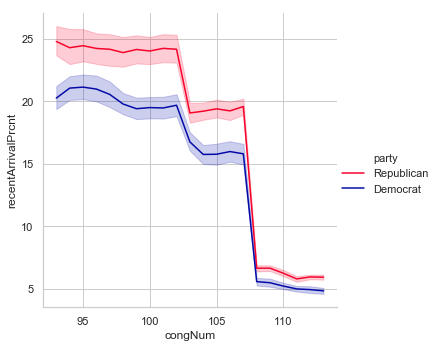

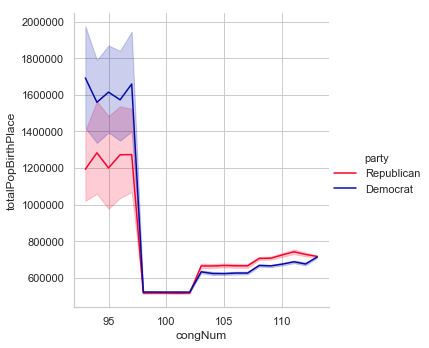

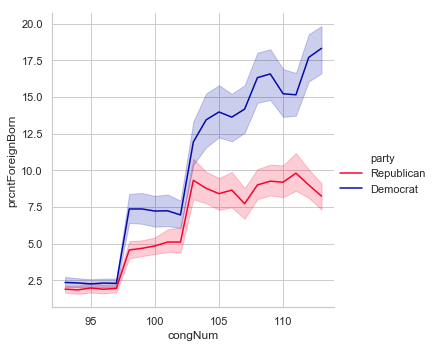

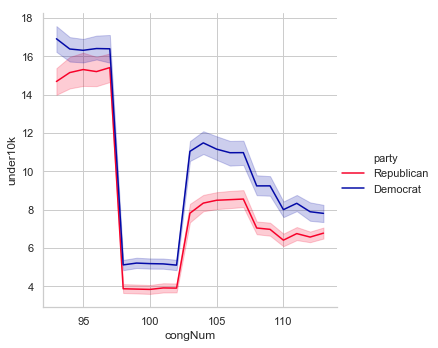

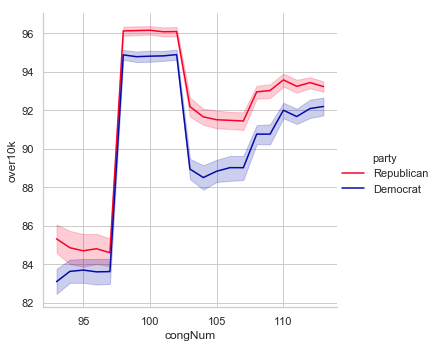

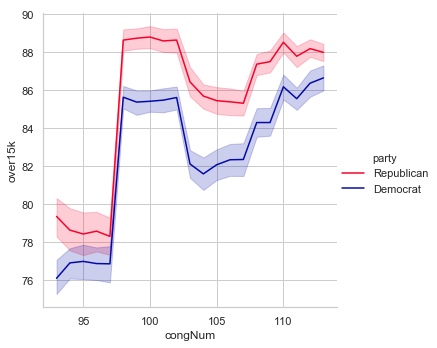

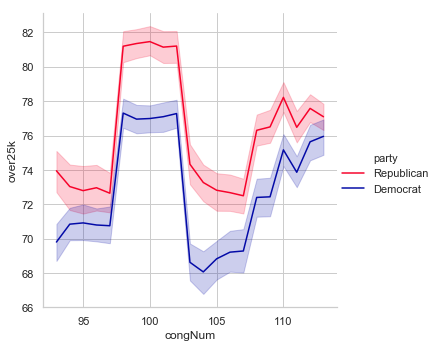

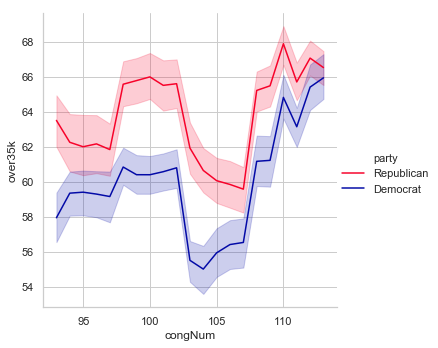

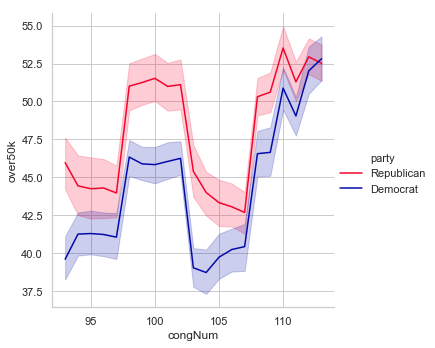

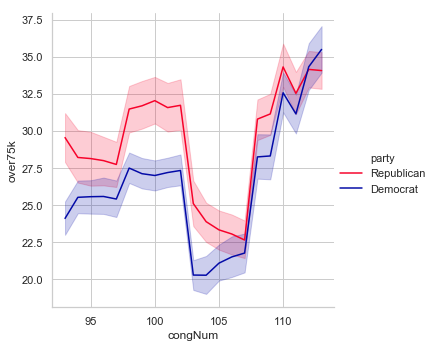

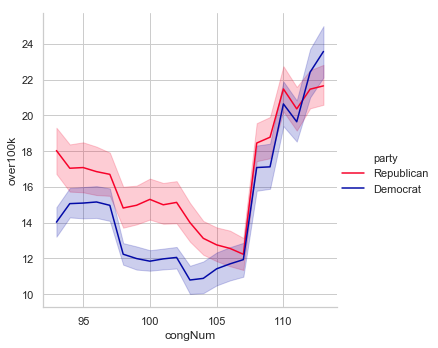

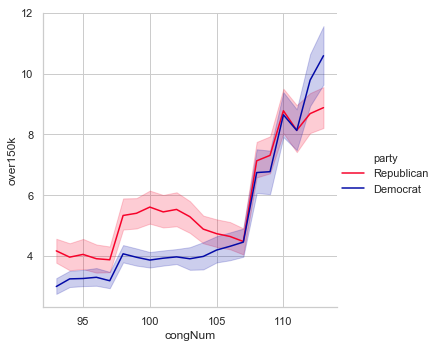

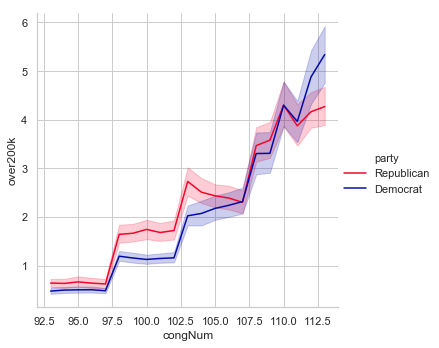

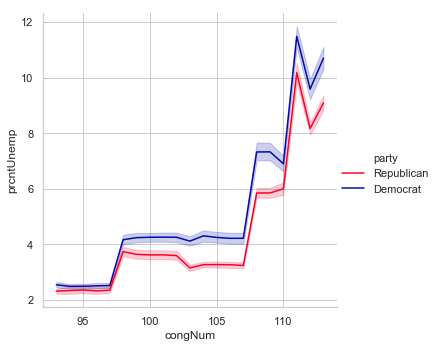

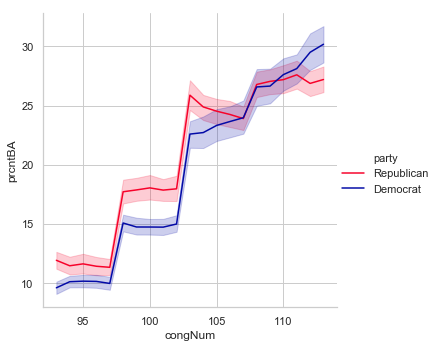

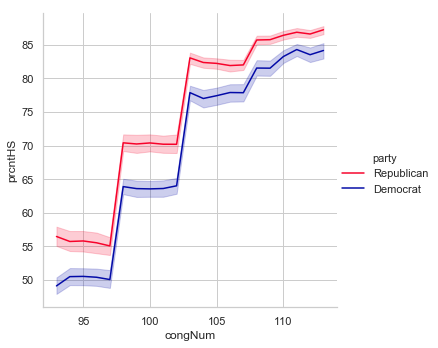

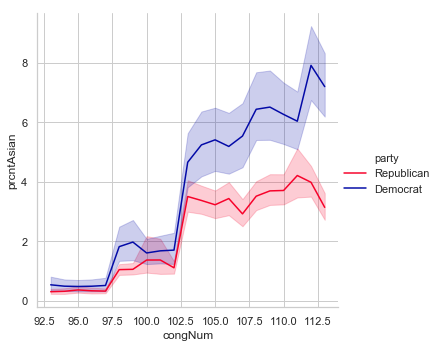

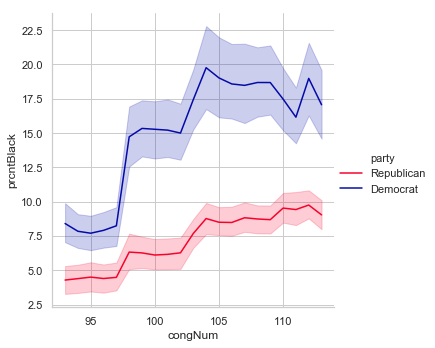

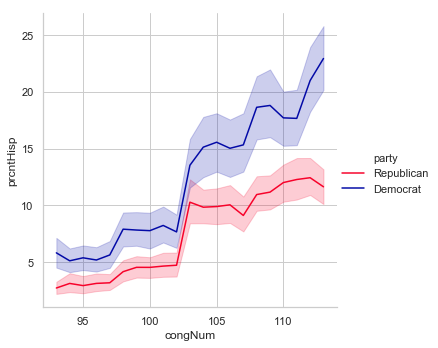

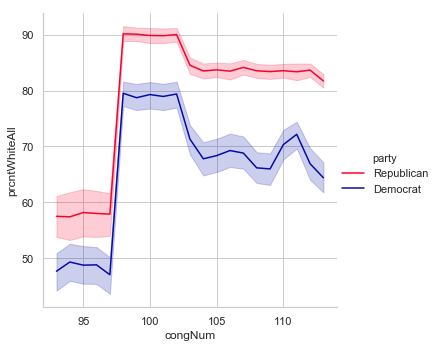

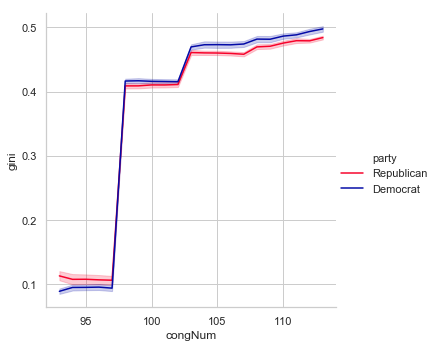

In [315]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')
colors = ['cherry red', 'cobalt blue']

# Perform graphical EDA on recentArrivalPrcnt
sns.relplot(x='congNum', y='recentArrivalPrcnt', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on totalPopBirthPlace
sns.relplot(x='congNum', y='totalPopBirthPlace', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntForeignBorn
sns.relplot(x='congNum', y='prcntForeignBorn', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on under10k
sns.relplot(x='congNum', y='under10k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over10k
sns.relplot(x='congNum', y='over10k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over15k
sns.relplot(x='congNum', y='over15k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over25k
sns.relplot(x='congNum', y='over25k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over35k
sns.relplot(x='congNum', y='over35k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over50k
sns.relplot(x='congNum', y='over50k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over75k
sns.relplot(x='congNum', y='over75k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over100k
sns.relplot(x='congNum', y='over100k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over150k
sns.relplot(x='congNum', y='over150k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over200k
sns.relplot(x='congNum', y='over200k', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntUnemp
sns.relplot(x='congNum', y='prcntUnemp', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntBA
sns.relplot(x='congNum', y='prcntBA', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntHS
sns.relplot(x='congNum', y='prcntHS', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntAsian
sns.relplot(x='congNum', y='prcntAsian', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntBlack
sns.relplot(x='congNum', y='prcntBlack', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntHisp
sns.relplot(x='congNum', y='prcntHisp', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntWhiteAll
sns.relplot(x='congNum', y='prcntWhiteAll', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on gini
sns.relplot(x='congNum', y='gini', hue='party', kind='line', palette=sns.xkcd_palette(colors), data=df)

#### Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

In general, it appears that there are large, national changes in certain variables that affect Democratic and Republican districts in the same way. For example, according to the graph plotting **recentArrivalPrcnt** there has been a distinct reduction in the mobility of Americans. 

The **recentArrivalPrcnt** variable tracks the percent of the district that recently moved into the district from another county or state. It definitely appears that between the 100th and 110th Congresses, there was a distinct reduction in the percentage of the district populations that recently moved from another county or state, suggesting that fewer people are moving and that people are more locked into their districts than they were historically.

In addition, it appears that the percent of the districts that was born in a foreign country has also increased in both Democratic and Republican districts - though this trends is significantly more pronounced in Democratic districts.

Additionally, unemployment rates have increased in both districts while High School and College graduation rates have increased in both as well.

Finally, it appears that inequality has increased (as measured by the gini coefficient - a smaller gini value signifying a more equal district) in both Democratic and Republican districts. 


#### Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

Of course, we are more interested in those things that differentiate Democratic and Republican districts. Though many of these national trends are represented in both types of district, we also see many of these trends are being more pronounced in one type of district versus another.

For example, though mobility has declined is has declined less in Republican districts; and though the percent of the district that was born in a foreign country has also increased in both Democratic and Republican districts, this trend is dramatically more pronounced in Democratic districts, and has actually declined in recent years amongst Republican districts.

There also appears to be a distinct gap between Republican and Democratic districts when it comes to the percent of households earning more than 35,000 dollars. There is a large and persistent inequality, with a greater percentage of Republican district households earning more than 35,000 dollars.

Though graduation rates have increased for both High School and College in both Democratic and Republican districts Republican districts have a consistently higher rate of High School gradutaion, while Democatic districts have only recently outpaced Republican districts in terms of College graduation - a reversal of a long established trend.

The greatest divergences appear when we compare Democratic and Republican districts by racial composition. Democratic districts have consistently higher concentrations of Asian, Black, and Hispanic Americans than their Republican counteraparts, and both Democratic and Republican districts are becoming less white overall. 

In sum, the trends point toward a more static, highly educated, and diverse nation - but with these trends being far more pronounced in Democratic districts than in Republican ones. Therefore, it is my contention that as we look to predict a district's party affiliation we will see that more static, highly educated, and diverse districts will vote Democratics, while more mobile, less educated, and more homogenous districts will vote Republican.

## Analysis 1: Classifying Congressional Districts based on Demographic Data

### Model 1: Logistic Regression

In [316]:
# LOGISTIC REGRESSION

# Convert non-numerical data using one-hot encoding
df_logistic = pd.get_dummies(df, columns=['party'])

# Delete the 'party_Republican' column
del df_logistic['party_Republican']

# Seperate out the Democrat and Republican data for statistical comparison
Democrat_df = df_logistic[df_logistic['party_Democrat'] == 1]
Democrat_df = Democrat_df[['recentArrivalPrcnt', 'totalPopBirthPlace', 'prcntForeignBorn', 'under10k', 'over10k', 'over15k', 'over25k', 'over35k', 'over50k', 'over75k', 'over100k', 'over150k', 'over200k', 'prcntUnemp', 'prcntBA', 'prcntHS', 'prcntAsian', 'prcntBlack', 'prcntHisp', 'prcntWhiteAll', 'gini']]

Republican_df = df_logistic[df_logistic['party_Democrat'] == 0]
Republican_df = Republican_df[['recentArrivalPrcnt', 'totalPopBirthPlace', 'prcntForeignBorn', 'under10k', 'over10k', 'over15k', 'over25k', 'over35k', 'over50k', 'over75k', 'over100k', 'over150k', 'over200k', 'prcntUnemp', 'prcntBA', 'prcntHS', 'prcntAsian', 'prcntBlack', 'prcntHisp', 'prcntWhiteAll', 'gini']]

# Calculate summary statistics on the two data sets
print(Democrat_df.describe().transpose())
print(Republican_df.describe().transpose())

                     count           mean           std            min  \
recentArrivalPrcnt  5124.0      15.429270  9.041663e+00       0.700000   
totalPopBirthPlace  5124.0  876942.576893  1.184444e+06  392934.000000   
prcntForeignBorn    5124.0       9.613794  1.126144e+01       0.138861   
under10k            5124.0      10.298618  5.936332e+00       1.665103   
over10k             5124.0      89.697928  5.938921e+00      67.818984   
over15k             5124.0      82.460148  7.066203e+00      58.243076   
over25k             5124.0      72.867819  8.702131e+00      43.200000   
over35k             5124.0      59.953064  1.045999e+01      29.205036   
over50k             5124.0      44.230729  1.179155e+01      17.212318   
over75k             5124.0      26.505244  1.057057e+01       6.900000   
over100k            5124.0      14.709576  8.276949e+00       2.179128   
over150k            5124.0       4.955634  4.375586e+00       0.481448   
over200k            5124.0       1.975

In [317]:
# Create variables X and y arrays from the dataset
features_df = df_logistic.drop(columns=['stateDist', 'congNum', 'party_Democrat'])

X = features_df
y = df_logistic['party_Democrat']

# Run a logit model on the data to determine p-values
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                          Results: Logit
Model:                Logit              Pseudo R-squared:   inf   
Dependent Variable:   party_Democrat     AIC:                inf   
Date:                 2019-02-20 13:00   BIC:                inf   
No. Observations:     9298               Log-Likelihood:     -inf  
Df Model:             20                 LL-Null:            0.0000
Df Residuals:         9277               LLR p-value:        1.0000
Converged:            1.0000             Scale:              1.0000
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
recentArrivalPrcnt -0.0370   0.0041  -8.9709 0.0000 -0.0450 -0.0289
totalPopBirthPlace -0.0000   0.0000  -2.2300 0.0257 -0.0000 -0.0000
prcntForeignBorn    0.0624   0.0069   9.0382 0.0000  0.0489  0.0760
under10

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [318]:
# Remove insignificant variables from the model
X = features_df.drop(columns=['over75k', 'over150k', 'over200k', 'prcntUnemp'])

# Run a second logit model on the data to determine new p-values
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                          Results: Logit
Model:                Logit              Pseudo R-squared:   inf   
Dependent Variable:   party_Democrat     AIC:                inf   
Date:                 2019-02-20 13:00   BIC:                inf   
No. Observations:     9298               Log-Likelihood:     -inf  
Df Model:             16                 LL-Null:            0.0000
Df Residuals:         9281               LLR p-value:        1.0000
Converged:            1.0000             Scale:              1.0000
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
recentArrivalPrcnt -0.0389   0.0037 -10.6502 0.0000 -0.0461 -0.0317
totalPopBirthPlace -0.0000   0.0000  -2.7713 0

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [319]:
# Determine correlation amongst the remaining significant variables
print(X.corr())

                    recentArrivalPrcnt  totalPopBirthPlace  prcntForeignBorn  \
recentArrivalPrcnt            1.000000            0.123293         -0.377222   
totalPopBirthPlace            0.123293            1.000000         -0.128723   
prcntForeignBorn             -0.377222           -0.128723          1.000000   
under10k                      0.125286            0.221588         -0.207529   
over10k                      -0.125004           -0.221434          0.206980   
over15k                      -0.149867           -0.183050          0.238152   
over25k                       0.021177           -0.085048          0.130591   
over35k                      -0.070379           -0.047278          0.176151   
over50k                      -0.120455           -0.080565          0.236725   
over100k                     -0.175759            0.016933          0.316566   
prcntBA                      -0.282593           -0.145474          0.443792   
prcntHS                      -0.317288  

In [320]:
# Remove highly correlated features
X = features_df.drop(columns=['under10k'])

In [321]:
# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Set an instance of LogisticRegression as the model
logreg = LogisticRegression(solver='liblinear')

# Fit the model to the training data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Determine the accuracy from the testing data
print('Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

Naive Accuracy Score: 0.6387096774193548


In [322]:
# Use GridSearchCV to find the best C parameter value
parameters = {"C": [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000]}
logreg_fit = GridSearchCV(logreg, param_grid=parameters, cv=5, scoring="accuracy")
logreg_fit.fit(X_test, y_test)
print('Best C hyperparameter: ' + str(logreg_fit.best_params_))

# Use the new best C parameter value on the fitted model
logreg_fitted = LogisticRegression(C=logreg_fit.best_params_['C'], solver='liblinear')
logreg_fitted.fit(X_train, y_train)
y_pred = logreg_fitted.predict(X_test)
print('Fitted Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

Best C hyperparameter: {'C': 1e-05}
Fitted Naive Accuracy Score: 0.6415770609318996


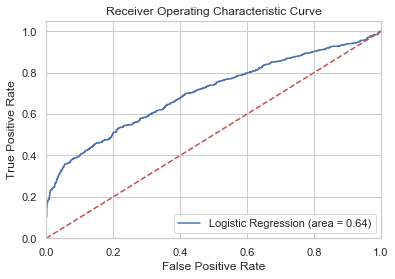

In [323]:
# Produce a ROC curve to visualize the model's accuracy
logit_roc_auc = roc_auc_score(y_test, logreg_fitted.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_fitted.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [324]:
# Perform K-fold cross-validation using balance accuracy scoring to determine the validated accuracy of the model
scores = cross_val_score(logreg_fitted, X, y, cv=5, scoring='balanced_accuracy')
print("Validated Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Validated Accuracy Score: 0.55 (+/- 0.15)


### Model 2: K-Nearst Neighbors

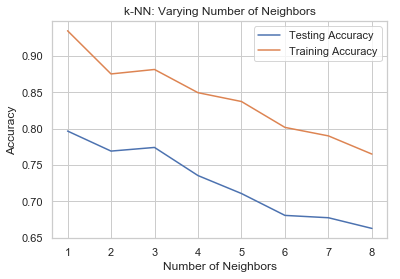

In [325]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [326]:
# Create a k-NN classifier utilizing the best K value: knn
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = knn.predict(X_test)

# Determine the naive accuracy from the testing data
print('Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

# Perform K-fold cross-validation using balance accuracy scoring to determine the validated accuracy of the model
scores = cross_val_score(knn, X, y, cv=5, scoring='balanced_accuracy')
print("Validated Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Accuracy Score: 0.7967741935483871
Validated Accuracy Score: 0.70 (+/- 0.24)


### Model 3: Decision Tree Classifier

In [327]:
# Create a Decision Tree Classifier: dtc
dtc = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1)

# Fit the classifier to the data
dtc.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = dtc.predict(X_test)

# Determine the naive accuracy from the testing data
print('Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

# Perform K-fold cross-validation using balance accuracy scoring to determine the validated accuracy of the model
scores = cross_val_score(dtc, X, y, cv=5, scoring='balanced_accuracy')
print("Validated Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Accuracy Score: 0.8573476702508961
Validated Accuracy Score: 0.72 (+/- 0.24)


### Model 4: Random Forest Classifier

In [328]:
# Create a Random Forest Classifier: rfc
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=1)

# Fit the classifier to the data
rfc.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = rfc.predict(X_test)

# Determine the naive accuracy from the testing data
print('Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

# Perform K-fold cross-validation using balance accuracy scoring to determine the validated accuracy of the model
scores = cross_val_score(rfc, X, y, cv=5, scoring='balanced_accuracy')
print("Validated Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Accuracy Score: 0.8853046594982079
Validated Accuracy Score: 0.73 (+/- 0.30)


### Model 5: Support Vector Classifier

In [329]:
# Create a Support Vector Classifier: svc
svc = SVC(gamma='auto')

# Fit the classifier to the data
svc.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = svc.predict(X_test)

# Determine the naive accuracy from the testing data
print('Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

# Perform K-fold cross-validation using balance accuracy scoring to determine the validated accuracy of the model
scores = cross_val_score(svc, X, y, cv=5, scoring='balanced_accuracy')
print("Validated Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Accuracy Score: 0.8060931899641577
Validated Accuracy Score: 0.63 (+/- 0.28)


### Model 6: AdaBoost Classifier

In [330]:
# Create a AdaBoost Classifier: abc
abc = AdaBoostClassifier()

# Fit the classifier to the data
abc.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = abc.predict(X_test)

# Determine the naive accuracy from the testing data
print('Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

# Perform K-fold cross-validation using balance accuracy scoring to determine the validated accuracy of the model
scores = cross_val_score(abc, X, y, cv=5, scoring='balanced_accuracy')
print("Validated Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Accuracy Score: 0.7200716845878136
Validated Accuracy Score: 0.61 (+/- 0.17)


### Model 7: Bagging Classifier

In [331]:
# Create a Bagging Classifier: bc
bc = BaggingClassifier()

# Fit the classifier to the data
bc.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = bc.predict(X_test)

# Determine the naive accuracy from the testing data
print('Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

# Perform K-fold cross-validation using balance accuracy scoring to determine the validated accuracy of the model
scores = cross_val_score(bc, X, y, cv=5, scoring='balanced_accuracy')
print("Validated Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Accuracy Score: 0.8831541218637993
Validated Accuracy Score: 0.73 (+/- 0.27)


### Model 8: Gradient Boosting Classifier

In [332]:
# Create a Gradient Boosting Classifier: gbc
gbc = GradientBoostingClassifier()

# Fit the classifier to the data
gbc.fit(X_train, y_train)

# Predict the labels for the training data
y_pred = bc.predict(X_test)

# Determine the naive accuracy from the testing data
print('Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

# Perform K-fold cross-validation using balance accuracy scoring to determine the validated accuracy of the model
scores = cross_val_score(gbc, X, y, cv=5, scoring='balanced_accuracy')
print("Validated Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Accuracy Score: 0.8831541218637993
Validated Accuracy Score: 0.63 (+/- 0.21)


### Model 9: Ensemble Voting Classifier (Hard)

In [333]:
# Create a Hard Voting Classifier: vc
vc = VotingClassifier(estimators=[('knn', knn), ('dtc', dtc), ('rfc', rfc), ('bc', bc)], voting='hard')

# Set the parameters for the various classifier models
#params = {'dtc__min_samples_split': [2, 10, 100], 
#          'dtc__min_samples_leaf': [0.01, 0.1, 1, 10, 100],
#          'rfc__min_samples_split': [2, 10, 100],
#          'rfc__min_samples_leaf': [0.01, 0.1, 1, 10, 100]}

#vc_grid = GridSearchCV(estimator=vc, param_grid=params, cv=5)

# Fit the classifier to the data
vc.fit(X_train, y_train)

#print('Best Hyperparameters: ' + str(vc_grid.best_params_))

# Predict the labels for the training data
y_pred = vc.predict(X_test)

# Determine the naive accuracy from the testing data
print('Naive Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

# Perform K-fold cross-validation using balance accuracy scoring to determine the validated accuracy of the model
scores = cross_val_score(vc, X, y, cv=5, scoring='balanced_accuracy')
print("Validated Accuracy Score (Hard): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Accuracy Score: 0.8727598566308243
Validated Accuracy Score (Hard): 0.74 (+/- 0.28)


## Analysis 2: A K-Means Method of Categorizing Congressional Districts

In [334]:
# Determine estimated probabilities from the previously fitted logistic regression
X_proba = logreg_fitted.predict_proba(X)

# Determine the Democratic specific probabilities from the previously fitted logistic regression
Democratic_proba = logreg_fitted.predict_proba(X)[:,1]

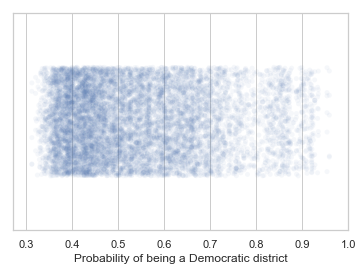

In [335]:
# Plot the estimated probabilities of the districts
sns.stripplot(x=Democratic_proba, jitter=0.25, alpha=0.05)
plt.xlabel('Probability of being a Democratic district')
plt.show()

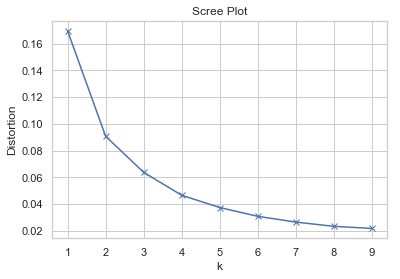

In [336]:
# Determine k using a Scree Plot
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_proba)
    kmeanModel.fit(X_proba)
    distortions.append(sum(np.min(cdist(X_proba, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_proba.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Scree Plot')
plt.show()

In [337]:
# Create in instance of the K-Means model
kmeans = KMeans(n_clusters=3)

# Fit the model
kmeans.fit(X_proba)

# Predict y: y_kmeans
y_kmeans = kmeans.predict(X_proba)

In [338]:
# Bring in stateDist and congNum
stateDist = df_logistic['stateDist']
congNum = df_logistic['congNum']

assert len(stateDist) == len(y_kmeans)
assert len(congNum) == len(y_kmeans)

# Zip together stateDist, y_prob, and y_kmeans using a list comprehension: zipped
zipped = [list(t) for t in zip(stateDist, congNum, Democratic_proba, y_kmeans)]

# Convert the zipped list into a DataFrame: df_clustered
df_clustered = pd.DataFrame(zipped, columns=['stateDist', 'congNum', 'Democratic_proba', 'cluster'])

# Print the resulting DataFrame
print(df_clustered.head())

  stateDist  congNum  Democratic_proba  cluster
0      AK.0     93.0          0.539293        1
1      AL.1     93.0          0.694276        1
2      AL.2     93.0          0.635564        1
3      AL.3     93.0          0.665594        1
4      AL.4     93.0          0.479087        0


### Utility 1: Analyzing Democratic_proba Over Time 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


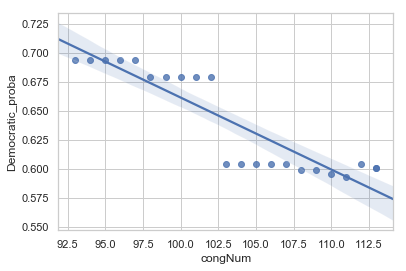

In [339]:
# Select AL.1 specific data
df_clustered_AL_1 = df_clustered[df_clustered['stateDist'] == 'AL.1']

# Plot y_prob trend
sns.regplot(x='congNum', y='Democratic_proba', data=df_clustered_AL_1)

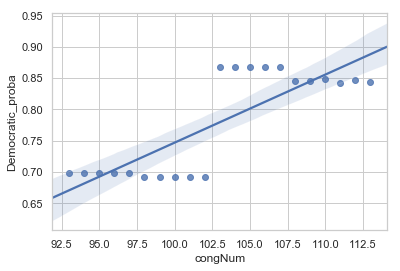

In [340]:
# Select AL.7 specific data
df_clustered_AL_7 = df_clustered[df_clustered['stateDist'] == 'AL.7']

# Plot y_prob trend
sns.regplot(x='congNum', y='Democratic_proba', data=df_clustered_AL_7)

### Utility 2: Analyzing Cluster Trends

In [341]:
# Sort df_clustered by y_prob to see pattern in cluster
print(df_clustered.sort_values(by='Democratic_proba'))

     stateDist  congNum  Democratic_proba  cluster
3735     MI.18    101.0          0.312177        0
2414     MI.18     98.0          0.312177        0
3294     MI.18    100.0          0.312177        0
4179     MI.18    102.0          0.312177        0
2853     MI.18     99.0          0.312177        0
4190      MN.3    102.0          0.320283        0
3746      MN.3    101.0          0.320283        0
2425      MN.3     98.0          0.320283        0
3305      MN.3    100.0          0.320283        0
2864      MN.3     99.0          0.320283        0
7775      NH.1    110.0          0.322113        0
8385      VT.0    111.0          0.324150        0
8929      CO.2    113.0          0.325182        0
4588      KY.5    103.0          0.325584        0
5477      KY.5    105.0          0.325584        0
6356      KY.5    107.0          0.325584        0
5920      KY.5    106.0          0.325584        0
5033      KY.5    104.0          0.325584        0
8830      VT.0    112.0        

In [342]:
# Seperate out cluster 1 specific data and describe it
df_clustered_1 = df_clustered[df_clustered['cluster'] == 1]
print(df_clustered_1.describe())

# Seperate out cluster 0 specific data and describe it
df_clustered_0 = df_clustered[df_clustered['cluster'] == 0]
print(df_clustered_0.describe())

# Seperate out cluster 2 specific data and describe it
df_clustered_2 = df_clustered[df_clustered['cluster'] == 2]
print(df_clustered_2.describe())

           congNum  Democratic_proba  cluster
count  3212.000000       3212.000000   3212.0
mean    101.862702          0.602284      1.0
std       6.391086          0.054037      0.0
min      93.000000          0.513604      1.0
25%      96.000000          0.554809      1.0
50%     101.000000          0.600157      1.0
75%     108.000000          0.647318      1.0
max     113.000000          0.704677      1.0
           congNum  Democratic_proba  cluster
count  4778.000000       4778.000000   4778.0
mean    103.651737          0.424755      0.0
std       5.682966          0.046940      0.0
min      93.000000          0.312177      0.0
25%      99.000000          0.387982      0.0
50%     104.000000          0.424159      0.0
75%     108.000000          0.462365      0.0
max     113.000000          0.513385      0.0
           congNum  Democratic_proba  cluster
count  1308.000000       1308.000000   1308.0
mean    103.484709          0.807860      2.0
std       6.169296          0.0692